In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


   ## Input variables:

<ul> 
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### EDA

In [39]:
# checking the shape and null values
print(df.shape)
print(df.isna().sum())

(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [40]:
# numeric and categorical features:

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# columns: 'day' and 'month' could be  considered for both numerical and categorical. however I decided to
# chose 'day' for numerical and 'month' for categorical

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [43]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [44]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [45]:
# histogram for numerical values

# sns.histplot(df[numerical])

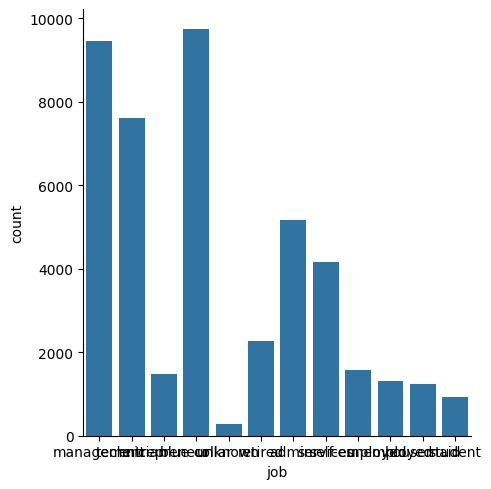

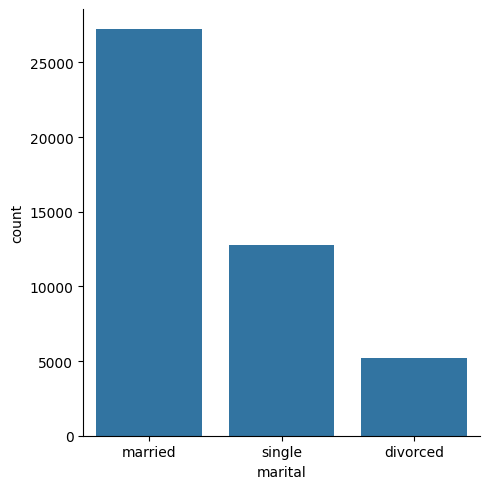

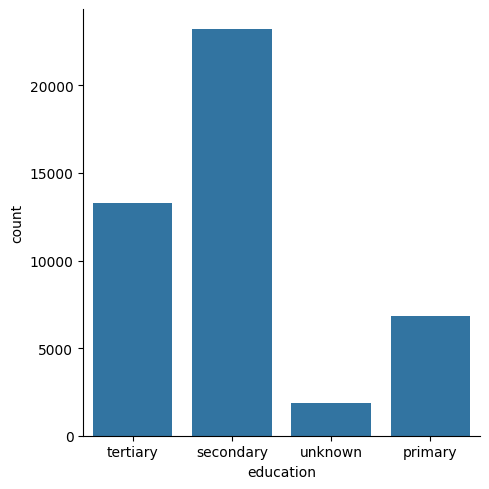

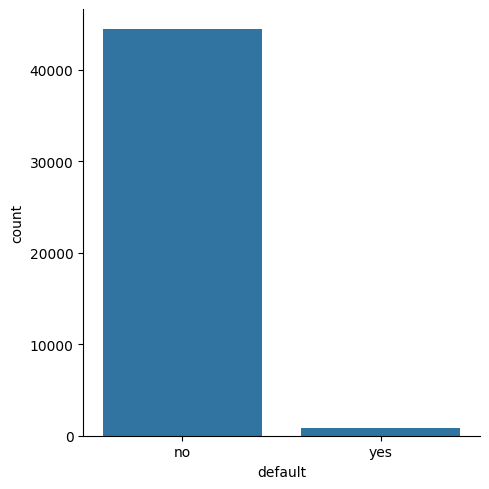

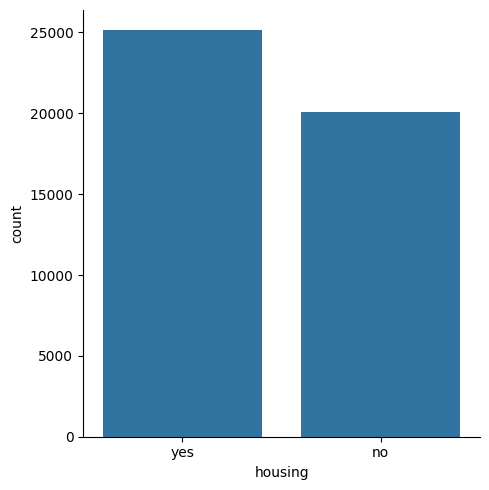

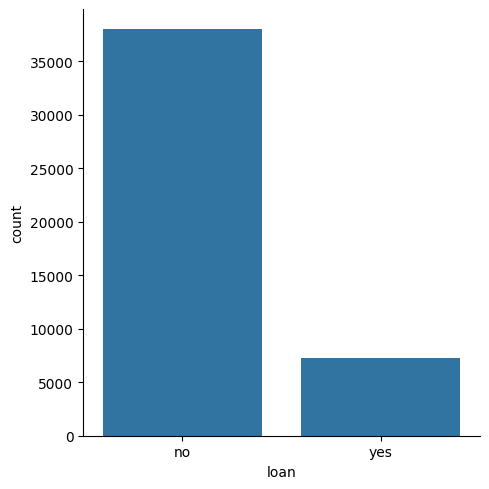

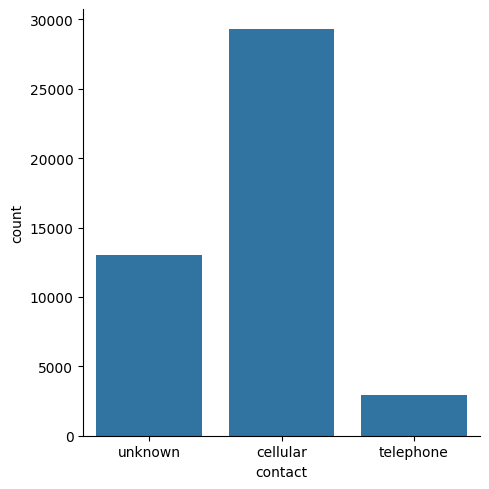

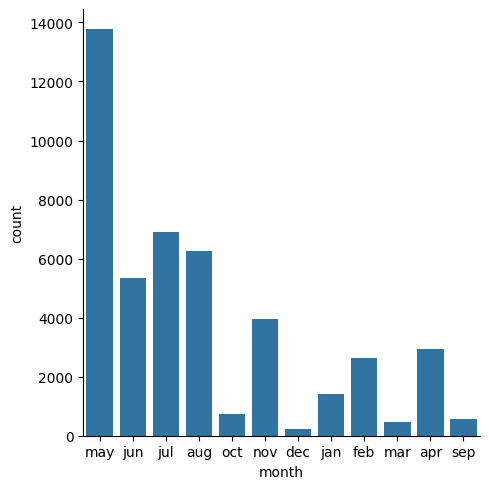

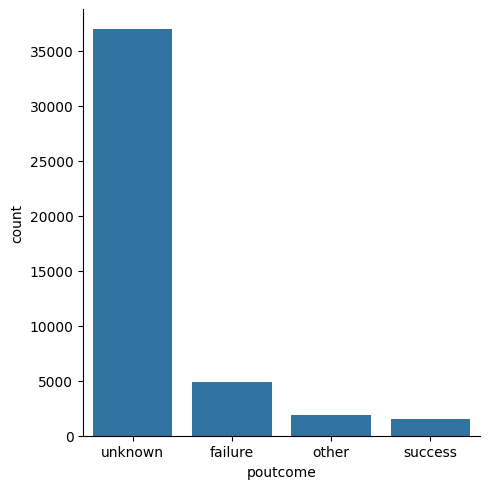

In [87]:
for col in categorical:
    sns.catplot(x= col, data=df, kind='count')

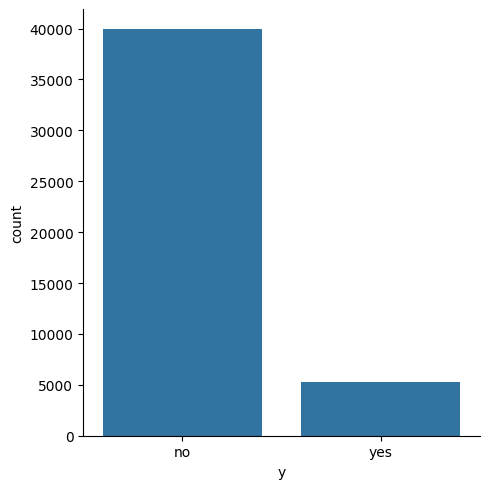

In [93]:
sns.catplot(x = 'y', data=df, kind='count')

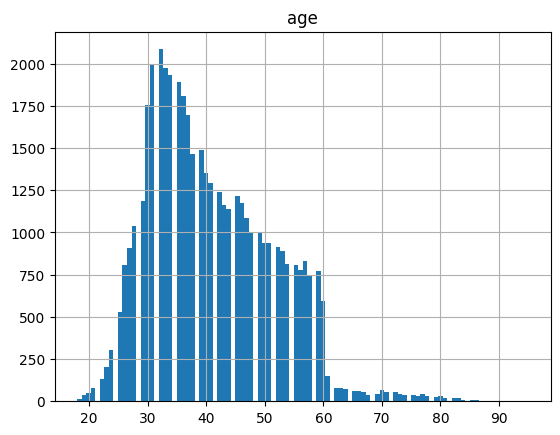

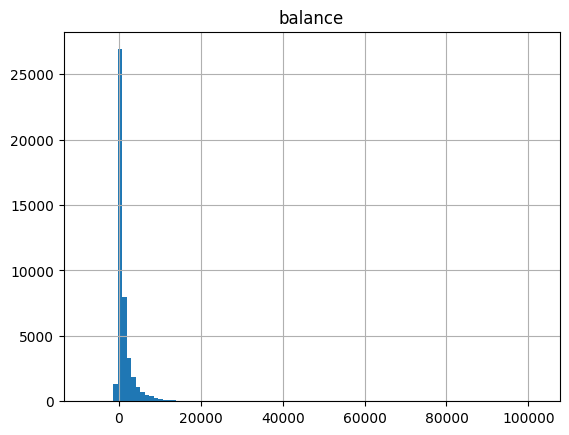

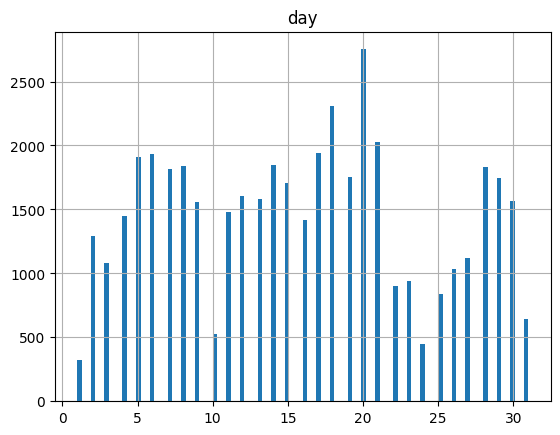

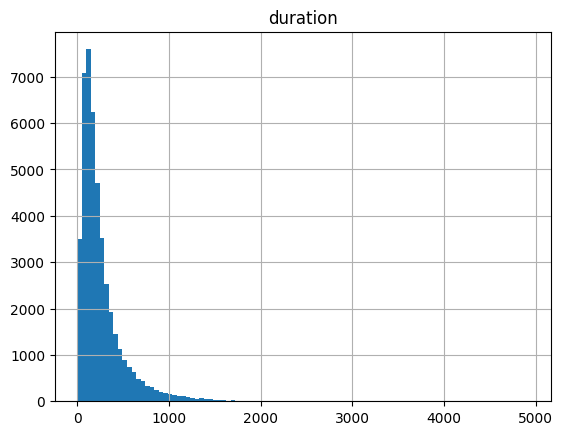

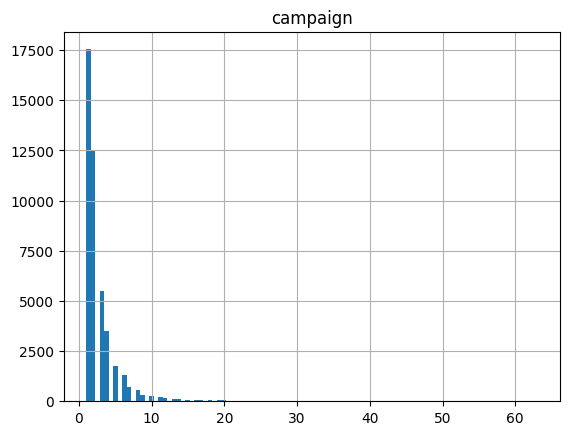

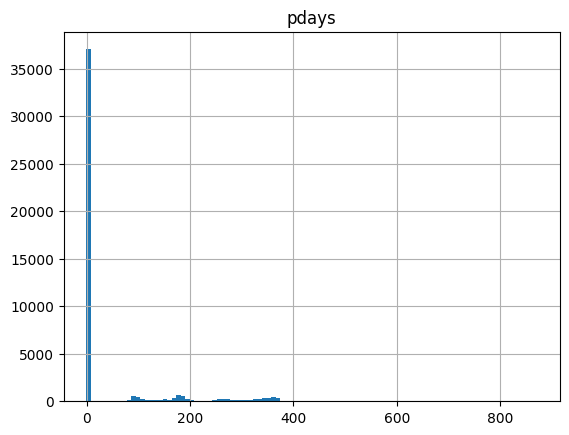

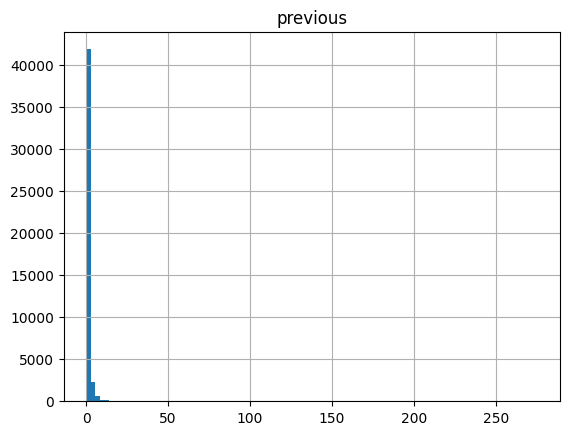

In [69]:
for col in numerical:
    df[[col]].hist(bins=100)

In [84]:
# pdays and previous show very imbalanced data

# trying log(pdays) and log(previous) 

/home/adel/ml/assignments/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

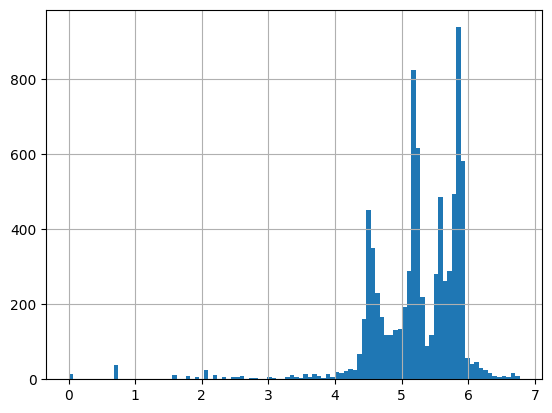

In [73]:
np.log(df['pdays']).hist(bins=100)

<Axes: >

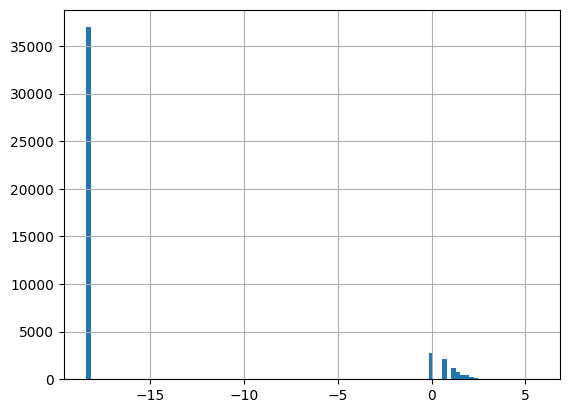

In [83]:
# adding smal number=1e-8 --> prevent error of log(0)

np.log(df['previous']+1e-8).hist(bins=100)

In [94]:
# apparently, log(pdays) could be helpful
# for log(previous) still plot shows imbalaned data

# standardization seems necessary 

In [95]:
# the target barplot shows it is not balanced --> it is necessary to consider stratify when 
# splitting the daya into X and y

#### feature correlation

In [ ]:
# the target is categorical so it is just possible to check the correlations between 
# numerical features

In [86]:
df[numerical].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
# not so much corre;ations between numerical features which is good.
# the maximum is 0.45 beween pday and previous

#### boxplots

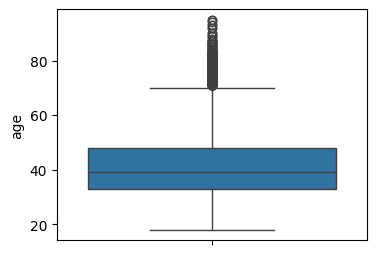

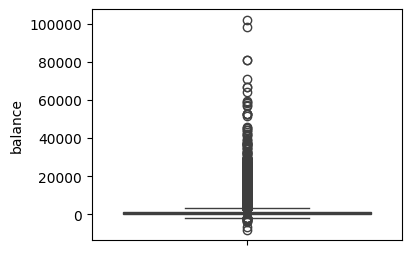

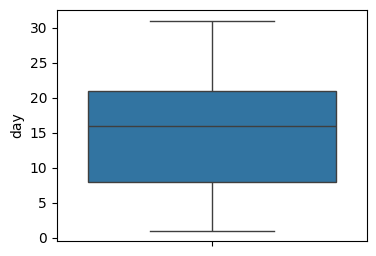

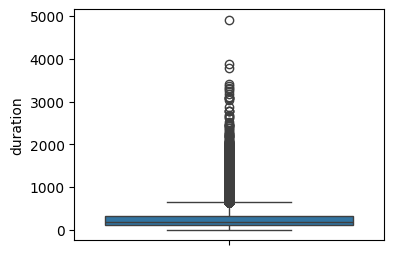

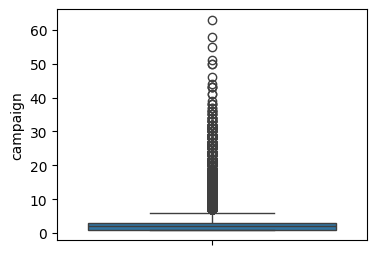

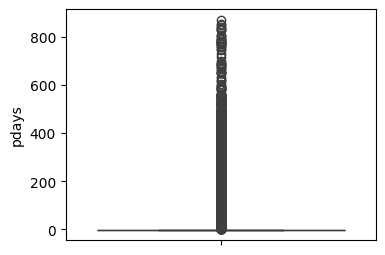

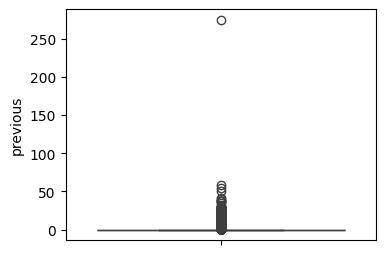

In [178]:
for col in numerical:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])

In [232]:
# columns 'previous' and 'pdays' show possible outliers so probabely need further investigations:
# checking the variances:

print(df['previous'].std())
print(df['pdays'].std())

2.3034410449312213
100.12874599059835


In [234]:
# the std for 'previous' is relatively low but still hard to conclude the feature could be removed
# take a t-test between 'previous' and 'y' to check the importance of 'previous'

import scipy.stats as stats

# Separate the numerical feature by the categories in the target variable
grouped_data = [df['previous'][df['y'] == category] for category in df['y'].unique()]
# t-test
f_statistic, p_value = stats.ttest_ind(*grouped_data)
# f-statistic and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: -19.910901271473993
P-value: 7.801830349805211e-88


In [ ]:
# the small p-value suggests 'previous' still has siginificant relationship with 'y' so for now
# keep it in the training set.

#### percentile slicing

In [246]:
# the boxplot for 'balance' shows possible outliers so we can use 0.95 percentile cutt off
# to make the dataset having less outliers

upper_balance = df['balance'].quantile(0.95)
lower_balance = df['balance'].quantile(0.05)

new_df = df.loc[(df['balance'] < upper_balance) & (df['balance'] > lower_balance)]

## preprocessing

In [100]:
# due to some outliers standardization for numerical features 
# one-hot encoding for categorical features

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('num', StandardScaler() , numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)]
)

In [247]:
# assiging features and targety

X = new_df.drop('y', axis=1)
y = new_df['y']
y = y.apply(lambda x: 0 if x == 'no' else 1)

In [248]:
# splitting the daya into features and target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) #stratify keeps distributions same for train and test

### modeling

In [249]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [250]:
# accuracy metrics

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### logistic regression

In [120]:
lr_model = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [260]:
lr_predict = lr_model.predict(X_test)

print('accuracy for logistic regression : ', accuracy_score(y_test, lr_predict))
print('f_1 score for logistic regression : ', f1_score(y_test, lr_predict))
print('precision score for logistic regression: ', precision_score(y_test, lr_predict))
print(confusion_matrix(y_test, lr_predict))

accuracy for logistic regression :  0.8987217305801377
f_1 score for logistic regression :  0.44504310344827586
precision score for logistic regression:  0.6344086021505376
[[8727  238]
 [ 792  413]]


#### svm classifier

In [263]:
hyper_params = {
    'svc__degree' : [2,3],
    'svc__gamma' : ['scale', 0.1, 1],
    'svc__C' : [1,0.1,10],
    'svc__kernel' : ['poly', 'rbf', 'sigmoid']
}

svc_model = make_pipeline(preprocessing, SVC())
svc_model_tuned = RandomizedSearchCV(svc_model, param_distributions=hyper_params, scoring='precision_micro', cv=2)

svc_model_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'day',
                                                                                'duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['job',
                                                                                'marital',
                                                                                'education',
                                                                                'default',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome'])])),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [1, 0.1, 10],
                                        'svc__degree': [2, 3],
                                        'svc__gamma': ['scale', 0.1, 1],
                                        'svc__kernel': ['poly', 'rbf',
                                                        'sigmoid']},
                   scoring='precision_micro')

In [264]:
print('best params for SVC: ', svc_model_tuned.best_params_)

best params for SVC:  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__degree': 2, 'svc__C': 1}


In [265]:
svc_predict = svc_model_tuned.predict(X_test)

print('accuracy for SVC : ', accuracy_score(y_test, svc_predict))
print('f_1 score for SVC : ', f1_score(y_test, svc_predict))
print('precision score for SVC: ', precision_score(y_test, svc_predict))
print(confusion_matrix(y_test, svc_predict))

accuracy for SVC :  0.9004916420845624
f_1 score for SVC :  0.45297297297297295
precision score for SVC:  0.6496124031007752
[[8739  226]
 [ 786  419]]


#### xgboost

In [270]:
hyper_params = {
    'xgbrfclassifier__learning_rate' : [0.05,0.1],
    'xgbrfclassifier__max_depth': [3,5,10],
    'xgbrfclassifier__n_estimators' : [100,200],
    'xgbrfclassifier__reg_alpha' : [1,10]
}

xgb_model = make_pipeline(preprocessing, XGBRFClassifier())
xgb_model_tuned = GridSearchCV(xgb_model, param_grid=hyper_params, scoring='precision_micro', cv=3)

xgb_model_tuned.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('xgbrfclassifier',
                                        XGBRFCla...
                                                        monotone_constraints=None,
                                                        multi_strategy=None,
                                                        n_estimators=None,
                                                        n_jobs=None,
                                                        num_parallel_tree=None,
                                                        objective='binary:logistic',
                                                        random_state=None,
                                                        reg_alpha=None, ...))]),
             param_grid={'xgbrfclassifier__learning_rate': [0.05, 0.1],
                         'xgbrfclassifier__max_depth': [3, 5, 10],
                         'xgbrfclassifier__n_estimators': [100, 200],
                         'xgbrfclassifier__reg_alpha': [1, 10]},
             scoring='precision_micro')

In [271]:
print('best params for xgboost: ', xgb_model_tuned.best_params_)

best params for xgboost:  {'xgbrfclassifier__learning_rate': 0.05, 'xgbrfclassifier__max_depth': 3, 'xgbrfclassifier__n_estimators': 100, 'xgbrfclassifier__reg_alpha': 1}


In [276]:
xgb_predict = xgb_model_tuned.predict(X_test)

print('accuracy for xgboost : ', accuracy_score(y_test, xgb_predict))
print('f_1 score for xgboost : ', f1_score(y_test, xgb_predict))
print('precision score for xgboost: ', precision_score(y_test, xgb_predict, zero_division=1))
print(confusion_matrix(y_test, xgb_predict))

accuracy for xgboost :  0.8815142576204523
f_1 score for xgboost :  0.0
precision score for xgboost:  1.0
[[8965    0]
 [1205    0]]


In [ ]:
###

# the xgboost model greatly underperformed for the f_1 score and precision score!

#### decision tree

In [280]:
hyper_params = {
    'decisiontreeclassifier__max_depth' : [3,5,10],
    'decisiontreeclassifier__min_samples_split': [2,5,10],
    'decisiontreeclassifier__min_samples_leaf' : [1,3,5],
    'decisiontreeclassifier__criterion' : ['gini', 'entropy'],
    # 'decisiontreeclassifier__max_features' : ['auto', 'sqrt']
}


dtc_model = make_pipeline(preprocessing, DecisionTreeClassifier())
dtc_model_tuned = GridSearchCV(dtc_model, param_grid=hyper_params, scoring='precision_micro', cv=3)
dtc_model_tuned.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 5, 10],
                         'decisiontreeclassifier__min_samples_leaf': [1, 3, 5],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='precision_micro')

In [285]:
dtc_model_tuned.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [286]:
dtc_predict = dtc_model_tuned.predict(X_test)

print('accuracy for decision tree : ', accuracy_score(y_test, dtc_predict))
print('f_1 score for decision tree : ', f1_score(y_test, dtc_predict))
print('precision score for decision tree: ', precision_score(y_test, dtc_predict))
print(confusion_matrix(y_test, dtc_predict))

accuracy for decision tree :  0.8941986234021633
f_1 score for decision tree :  0.43308746048472074
precision score for decision tree:  0.5930735930735931
[[8683  282]
 [ 794  411]]


In [293]:
###

# considering 'accuracy', 'precision score' and 'f1 score',
# SVC classifier with these hyperparameters was the best classifier:

# {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__degree': 2, 'svc__C': 1}


#### random forest

In [292]:
###

# among ensembles I planned to run random forest, but the training takes a huge time form my system 
# and unfortunately I couldn't run the model


### dimension reduction

In [ ]:
###

# as long as, the data is not super huge and most ml models can be run without difficulty, it doesn't
# seem that would be the case for this project

### feature selection

In [325]:
from sklearn.feature_selection import RFE


wrapper_selector = RFE(estimator=DecisionTreeClassifier(criterion='gini',max_depth= 3, min_samples_leaf= 1,
 min_samples_split= 2), n_features_to_select=8)
wrapper_selector_model = make_pipeline(preprocessing,wrapper_selector)
wrapper_selected_data = wrapper_selector_model.fit_transform(X_train, y_train)


In [326]:
wrapper_selected_data.shape

(30508, 8)

In [297]:
wrapper_predict = wrapper_selector_model.predict(X_test)

print('accuracy for decision tree : ', accuracy_score(y_test, wrapper_predict))
print('f_1 score for decision tree : ', f1_score(y_test, wrapper_predict))
print('precision score for decision tree: ', precision_score(y_test, wrapper_predict))
print(confusion_matrix(y_test, wrapper_predict))

accuracy for decision tree :  0.8941986234021633
f_1 score for decision tree :  0.43308746048472074
precision score for decision tree:  0.5930735930735931
[[8683  282]
 [ 794  411]]


In [ ]:
###

# DecisionTree classifier and wrapper feature selection (n_features_to_select=5) 
# couldn't make the model any better